# Oversampling
### SMOTE: syntethic minority oversampling technique 

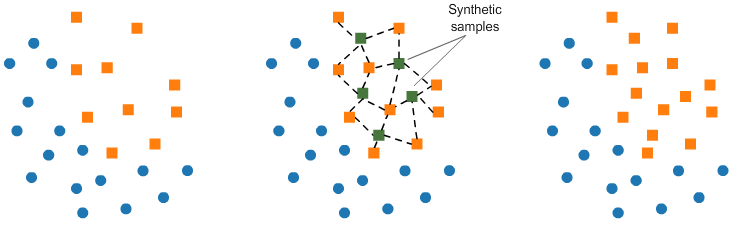

In [22]:
import pandas as pd
data = pd.read_csv("creditcard.csv")

In [23]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [24]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [25]:
data.drop_duplicates(inplace=True)

In [26]:
X = data.drop("Class", axis=1)
Y = data["Class"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [28]:
!pip install imbalanced-learn

In [29]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
X_over, Y_over = oversampling.fit_resample(X, Y)

In [30]:
Y.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [31]:
Y_over.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [32]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


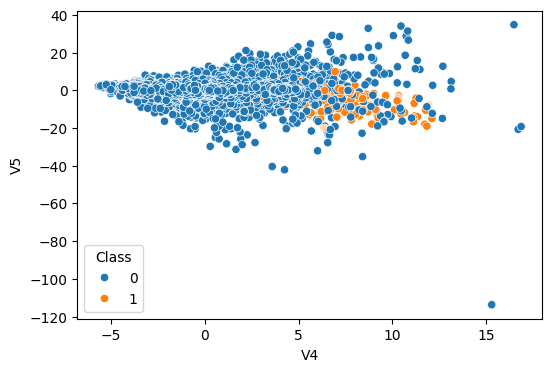

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
ax = sns.scatterplot(data = data, x='V4',y = 'V5', hue="Class")


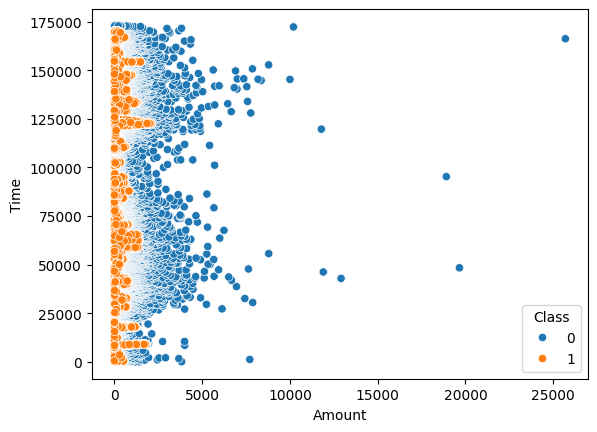

In [64]:
X_over['Class'] = Y_over
ax = sns.scatterplot(data = X_over, x='Amount',y = 'Time', hue="Class")


In [61]:
columnas = ["Amount", "Time", "V1", "V2"]

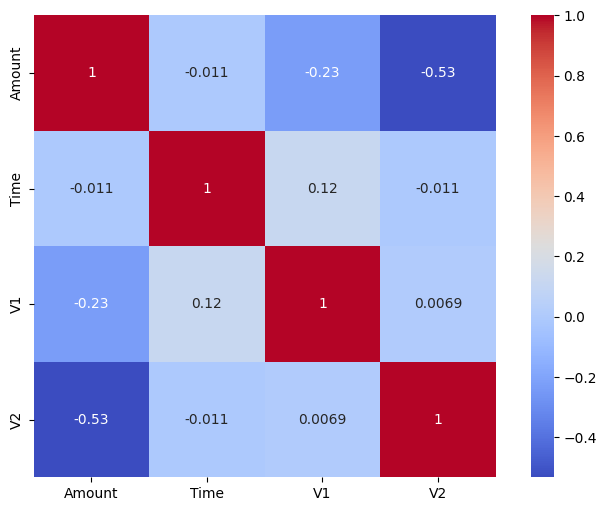

In [62]:
correlacion = data[columnas].corr()
plt.figure(figsize=(9, 6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", square=True)
plt.show()